# Linear Regression Assignment -Prashant Ramdas Patil

Business Goal:Model the demand for shared bikes with the available independent variables

#### Background :
A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 

#### Objective :
Understand the factors on which the demand for these shared bikes depends. Specifically, understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 


### Reading and Understanding the Data

In [471]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [472]:
# importing all important libraries 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler 
import statsmodels 
import statsmodels.api as sm

In [473]:
bikedata = pd.read_csv('day.csv')
bikedata.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [474]:
bikedata.shape

(730, 16)

In [475]:
bikedata.info()

# no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [476]:
bikedata.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


based on above , some thing check on temperature ,humidity and windspeed
check year on year 
check other factors such as season, month  holiday, working day

### Visualising continous data and later categorial variables

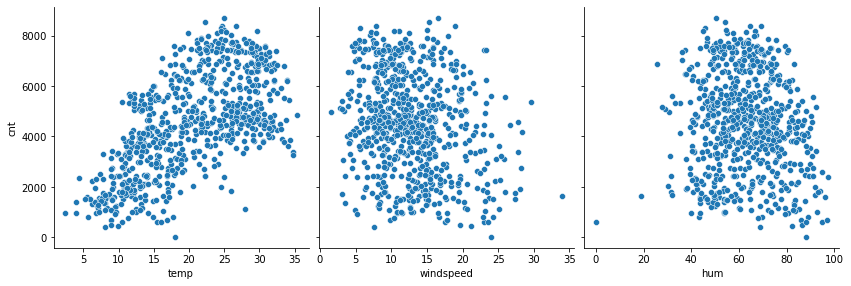

In [477]:
sns.pairplot(bikedata, x_vars=['temp', 'windspeed', 'hum'], y_vars='cnt',size=4, aspect=1, kind='scatter')
plt.show()

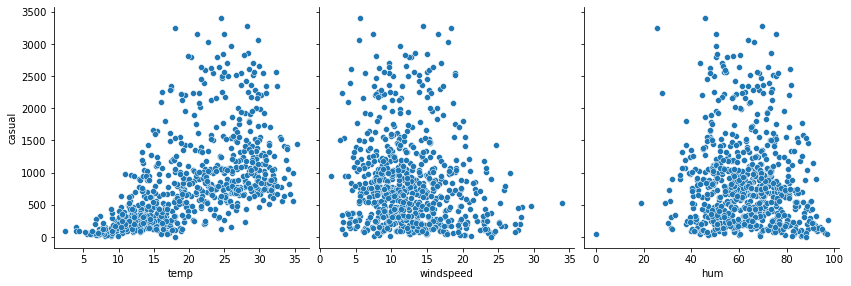

In [478]:
sns.pairplot(bikedata, x_vars=['temp', 'windspeed', 'hum'], y_vars='casual',size=4, aspect=1, kind='scatter')
plt.show()

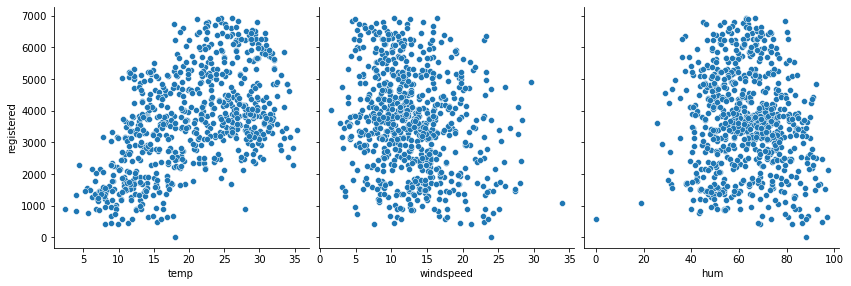

In [479]:
sns.pairplot(bikedata, x_vars=['temp', 'windspeed', 'hum'], y_vars='registered',size=4, aspect=1, kind='scatter')
plt.show()

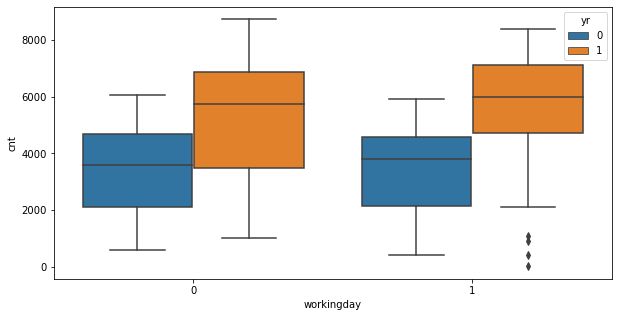

In [480]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'workingday', y = 'cnt', hue = 'yr', data = bikedata)
plt.show()

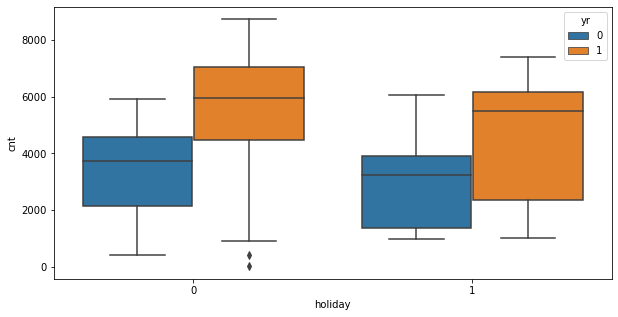

In [481]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'holiday', y = 'cnt', hue = 'yr', data = bikedata)
plt.show()

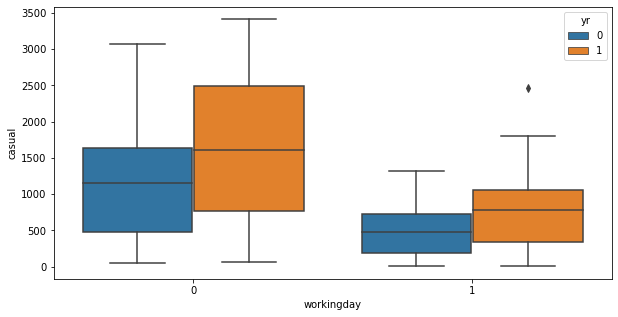

In [482]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'workingday', y = 'casual', hue = 'yr', data = bikedata)
plt.show()

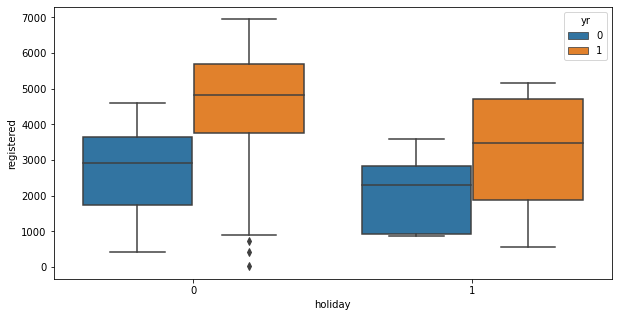

In [483]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'holiday', y = 'registered', hue = 'yr', data = bikedata)
plt.show()

In [484]:
bikedata2018 = bikedata[bikedata['yr'] == 0]
bikedata2019 = bikedata[bikedata['yr'] == 1]


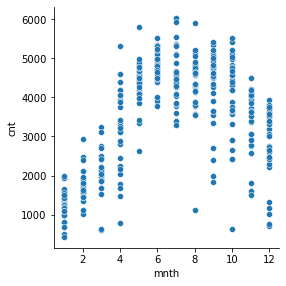

In [485]:
sns.pairplot(bikedata2018, x_vars=['mnth'], y_vars='cnt',size=4, aspect=1)
plt.show()

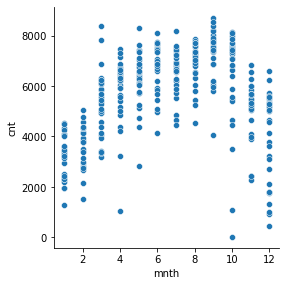

In [486]:
sns.pairplot(bikedata2019, x_vars=['mnth'], y_vars='cnt',size=4, aspect=1)
plt.show()

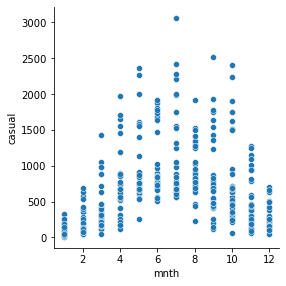

In [487]:
sns.pairplot(bikedata2018, x_vars=['mnth'], y_vars='casual',size=4, aspect=1)
plt.show()

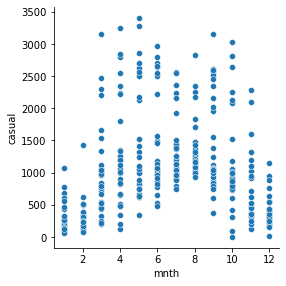

In [488]:
sns.pairplot(bikedata2019, x_vars=['mnth'], y_vars='casual',size=4, aspect=1)
plt.show()

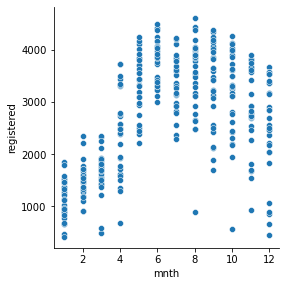

In [489]:
sns.pairplot(bikedata2018, x_vars=['mnth'], y_vars='registered',size=4, aspect=1)
plt.show()

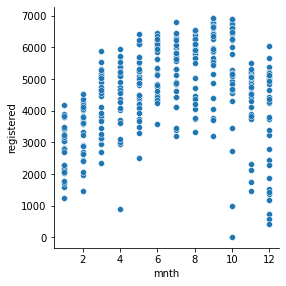

In [490]:
sns.pairplot(bikedata2019, x_vars=['mnth'], y_vars='registered',size=4, aspect=1)
plt.show()

###  DataPreparation 
Change season and weather into categorial variables 

In [491]:
bikedata['dteday'] = pd.to_datetime(bikedata['dteday'])
bikedata.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-02-01,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-03-01,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-04-01,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-05-01,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [492]:
def season_map(x):
    return x.map ({1: 'spring', 2: 'summer', 3: 'fall', 4 : 'winter'})

bikedata[['season']] = bikedata[['season']].apply(season_map)
bikedata.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-02-01,spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-03-01,spring,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-04-01,spring,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-05-01,spring,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [493]:
def weather_map(x):
    return x.map ({1: 'clear', 2: 'misty', 3: 'light', 4 : 'heavy'})

bikedata[['weathersit']] = bikedata[['weathersit']].apply(weather_map)
bikedata.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,spring,0,1,0,6,0,misty,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-02-01,spring,0,1,0,0,0,misty,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-03-01,spring,0,1,0,1,1,clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-04-01,spring,0,1,0,2,1,clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-05-01,spring,0,1,0,3,1,clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [494]:
weatherstatus = pd.get_dummies(bikedata['weathersit'])

weatherstatus.head()


,clear,light,misty
0,0,0,1
1,0,0,1
2,1,0,0
3,1,0,0
4,1,0,0


In [495]:
bikedata = pd.concat([bikedata, weatherstatus], axis = 1)
bikedata.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,clear,light,misty
0,1,2018-01-01,spring,0,1,0,6,0,misty,14.110847,18.18125,80.5833,10.749882,331,654,985,0,0,1
1,2,2018-02-01,spring,0,1,0,0,0,misty,14.902598,17.68695,69.6087,16.652113,131,670,801,0,0,1
2,3,2018-03-01,spring,0,1,0,1,1,clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349,1,0,0
3,4,2018-04-01,spring,0,1,0,2,1,clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562,1,0,0
4,5,2018-05-01,spring,0,1,0,3,1,clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600,1,0,0


In [496]:
seasonstatus = pd.get_dummies(bikedata['season'],drop_first = True)
seasonstatus.head()

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [497]:
bikedata = pd.concat([bikedata, seasonstatus], axis = 1)
bikedata.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,...,windspeed,casual,registered,cnt,clear,light,misty,spring,summer,winter
0,1,2018-01-01,spring,0,1,0,6,0,misty,14.110847,...,10.749882,331,654,985,0,0,1,1,0,0
1,2,2018-02-01,spring,0,1,0,0,0,misty,14.902598,...,16.652113,131,670,801,0,0,1,1,0,0
2,3,2018-03-01,spring,0,1,0,1,1,clear,8.050924,...,16.636703,120,1229,1349,1,0,0,1,0,0
3,4,2018-04-01,spring,0,1,0,2,1,clear,8.200000,...,10.739832,108,1454,1562,1,0,0,1,0,0
4,5,2018-05-01,spring,0,1,0,3,1,clear,9.305237,...,12.522300,82,1518,1600,1,0,0,1,0,0


In [498]:
bikedata.drop(['season','weathersit'], axis = 1, inplace = True)
bikedata.head()

,instant,dteday,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,clear,light,misty,spring,summer,winter
0,1,2018-01-01,0,1,0,6,0,14.110847,18.18125,80.5833,10.749882,331,654,985,0,0,1,1,0,0
1,2,2018-02-01,0,1,0,0,0,14.902598,17.68695,69.6087,16.652113,131,670,801,0,0,1,1,0,0
2,3,2018-03-01,0,1,0,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,1,0,0,1,0,0
3,4,2018-04-01,0,1,0,2,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,1,0,0,1,0,0
4,5,2018-05-01,0,1,0,3,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,1,0,0,1,0,0


In [499]:
# dropping month as considered season variable as independent variable 
bikedata.drop(['mnth','instant'], axis = 1, inplace = True)
bikedata.head(10)

,dteday,yr,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,clear,light,misty,spring,summer,winter
0,2018-01-01,0,0,6,0,14.110847,18.18125,80.5833,10.749882,331,654,985,0,0,1,1,0,0
1,2018-02-01,0,0,0,0,14.902598,17.68695,69.6087,16.652113,131,670,801,0,0,1,1,0,0
2,2018-03-01,0,0,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,1,0,0,1,0,0
3,2018-04-01,0,0,2,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,1,0,0,1,0,0
4,2018-05-01,0,0,3,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,1,0,0,1,0,0
5,2018-06-01,0,0,4,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606,1,0,0,1,0,0
6,2018-07-01,0,0,5,1,8.057402,10.44195,49.8696,11.304642,148,1362,1510,0,0,1,1,0,0
7,2018-08-01,0,0,6,0,6.765000,8.11270,53.5833,17.875868,68,891,959,0,0,1,1,0,0
8,2018-09-01,0,0,0,0,5.671653,5.80875,43.4167,24.250650,54,768,822,1,0,0,1,0,0
9,2018-10-01,0,0,1,1,6.184153,7.54440,48.2917,14.958889,41,1280,1321,1,0,0,1,0,0


In [500]:
bikedata['atemp']- bikedata['temp']

0      4.070403
1      2.784352
2      1.419326
3      2.406100
4      2.158263
         ...   
725    0.911253
726    2.365647
727    1.733347
728    1.095847
729    2.325197
Length: 730, dtype: float64

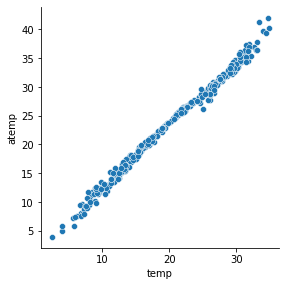

In [501]:
sns.pairplot(bikedata2018, x_vars='temp', y_vars='atemp',size=4, aspect=1)
plt.show()

#### seeing a direct relation between actual and feeling like temperature and hence dropping feeling like temperature 

In [502]:
bikedata.drop(['atemp'], axis = 1, inplace = True)
bikedata.head(10)

,dteday,yr,holiday,weekday,workingday,temp,hum,windspeed,casual,registered,cnt,clear,light,misty,spring,summer,winter
0,2018-01-01,0,0,6,0,14.110847,80.5833,10.749882,331,654,985,0,0,1,1,0,0
1,2018-02-01,0,0,0,0,14.902598,69.6087,16.652113,131,670,801,0,0,1,1,0,0
2,2018-03-01,0,0,1,1,8.050924,43.7273,16.636703,120,1229,1349,1,0,0,1,0,0
3,2018-04-01,0,0,2,1,8.200000,59.0435,10.739832,108,1454,1562,1,0,0,1,0,0
4,2018-05-01,0,0,3,1,9.305237,43.6957,12.522300,82,1518,1600,1,0,0,1,0,0
5,2018-06-01,0,0,4,1,8.378268,51.8261,6.000868,88,1518,1606,1,0,0,1,0,0
6,2018-07-01,0,0,5,1,8.057402,49.8696,11.304642,148,1362,1510,0,0,1,1,0,0
7,2018-08-01,0,0,6,0,6.765000,53.5833,17.875868,68,891,959,0,0,1,1,0,0
8,2018-09-01,0,0,0,0,5.671653,43.4167,24.250650,54,768,822,1,0,0,1,0,0
9,2018-10-01,0,0,1,1,6.184153,48.2917,14.958889,41,1280,1321,1,0,0,1,0,0


In [503]:
bikedata.drop(['casual','registered'], axis = 1, inplace = True)
#bikedata.drop(['mnth','instant'], axis = 1, inplace = True)
bikedata.drop(['weekday'], axis = 1, inplace = True)
bikedata.drop(['dteday'], axis = 1, inplace = True)
bikedata.head()


,yr,holiday,workingday,temp,hum,windspeed,cnt,clear,light,misty,spring,summer,winter
0,0,0,0,14.110847,80.5833,10.749882,985,0,0,1,1,0,0
1,0,0,0,14.902598,69.6087,16.652113,801,0,0,1,1,0,0
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,1,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,1,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,1,0,0


### Splitting the Data into Training and Testing Sets

In [504]:
df_train, df_test = train_test_split(bikedata, train_size = 0.7, test_size = 0.3, random_state = 100)

### Rescaling the Features using MinMax scaling.

In [505]:
scaler = MinMaxScaler()

num_vars = ['temp', 'hum', 'windspeed','cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,clear,light,misty,spring,summer,winter
653,1,0,1,0.509887,0.575354,0.300794,0.864243,1,0,0,0,0,1
576,1,0,1,0.815169,0.725633,0.264686,0.827658,1,0,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,0,0,1,1,0,0
728,1,0,0,0.245101,0.498067,0.663106,0.204096,1,0,0,1,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0,0,1,0,1,0


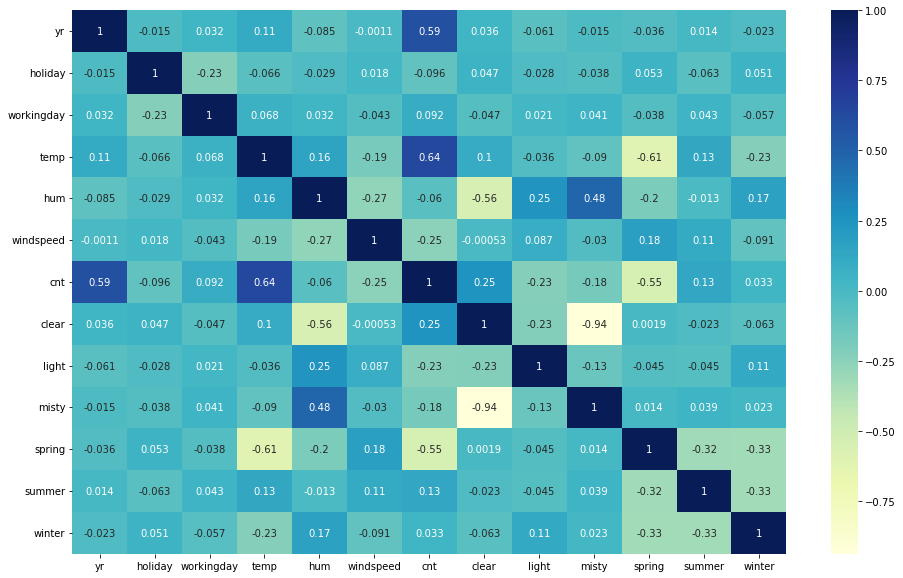

In [506]:
plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

### Building the  Model

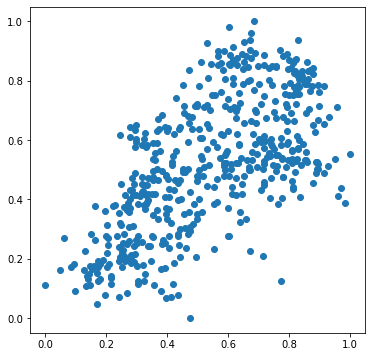

In [507]:
plt.figure(figsize=[6,6])
plt.scatter(df_train.temp, df_train.cnt)
plt.show()

In [508]:
y_train = df_train.pop('cnt')
y_train.head()


653    0.864243
576    0.827658
426    0.465255
728    0.204096
482    0.482973
Name: cnt, dtype: float64

In [509]:
x_train = df_train
x_train.head()

,yr,holiday,workingday,temp,hum,windspeed,clear,light,misty,spring,summer,winter
653,1,0,1,0.509887,0.575354,0.300794,1,0,0,0,0,1
576,1,0,1,0.815169,0.725633,0.264686,1,0,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0,0,1,1,0,0
728,1,0,0,0.245101,0.498067,0.663106,1,0,0,1,0,0
482,1,0,0,0.395666,0.504508,0.188475,0,0,1,0,1,0


In [510]:
#Build a linear model

#import statsmodels.api as sm
x_train_lm = sm.add_constant(x_train)
x_train_lm.head()

#lr_1 = sm.OLS(y_train, x_train_lm).fit()

#lr_1.params

,const,yr,holiday,workingday,temp,hum,windspeed,clear,light,misty,spring,summer,winter
653,1.0,1,0,1,0.509887,0.575354,0.300794,1,0,0,0,0,1
576,1.0,1,0,1,0.815169,0.725633,0.264686,1,0,0,0,0,0
426,1.0,1,0,0,0.442393,0.640189,0.255342,0,0,1,1,0,0
728,1.0,1,0,0,0.245101,0.498067,0.663106,1,0,0,1,0,0
482,1.0,1,0,0,0.395666,0.504508,0.188475,0,0,1,0,1,0


In [511]:
lr_1 = sm.OLS(y_train, x_train_lm).fit()

In [512]:
lr_1.params

const         0.135794
yr            0.230287
holiday      -0.074835
workingday    0.017496
temp          0.494988
hum          -0.138240
windspeed    -0.180687
clear         0.144312
light        -0.098330
misty         0.089812
spring       -0.074400
summer        0.041949
winter        0.089186
dtype: float64

In [466]:
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     218.6
Date:                Wed, 12 Jan 2022   Prob (F-statistic):          1.26e-182
Time:                        13:48:53   Log-Likelihood:                 488.00
No. Observations:                 510   AIC:                            -952.0
Df Residuals:                     498   BIC:                            -901.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1358      0.030      4.532      0.0

In [513]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [514]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = x_train.columns
vif['VIF'] = [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,clear,47.04
8,misty,31.32
9,spring,4.54
7,light,4.11
3,temp,3.50
11,winter,3.10
10,summer,2.06
4,hum,1.87
5,windspeed,1.20
1,holiday,1.07


#### Considering high probability of  t value of working day ,removing this variable and building the model again. 

In [515]:
x = x_train.drop('workingday', 1,)

In [516]:
x_train_lm = sm.add_constant(x)

lr_2 = sm.OLS(y_train, x_train_lm).fit()

In [517]:
# Print the summary of the model
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     238.8
Date:                Wed, 12 Jan 2022   Prob (F-statistic):          4.78e-183
Time:                        21:41:44   Log-Likelihood:                 486.16
No. Observations:                 510   AIC:                            -950.3
Df Residuals:                     499   BIC:                            -903.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1457      0.030      4.925      0.0

In [518]:
vif = pd.DataFrame()
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,clear,45.51
7,misty,30.37
8,spring,4.54
6,light,4.01
2,temp,3.50
10,winter,3.10
9,summer,2.06
3,hum,1.87
4,windspeed,1.19
0,yr,1.03


#### considering high VIF for clear weather, removing it from the model. 

In [519]:
x2 = x.drop('clear', 1,)

In [520]:
x2_train_lm = sm.add_constant(x2)

lr_3 = sm.OLS(y_train, x2_train_lm).fit()

In [521]:
# Print the summary of the model
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     238.8
Date:                Wed, 12 Jan 2022   Prob (F-statistic):          4.78e-183
Time:                        21:42:16   Log-Likelihood:                 486.16
No. Observations:                 510   AIC:                            -950.3
Df Residuals:                     499   BIC:                            -903.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2925      0.036      8.224      0.0

In [522]:
vif = pd.DataFrame()
vif['Features'] = x2.columns
vif['VIF'] = [variance_inflation_factor(x2.values, i) for i in range(x2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,27.02
2,temp,14.79
4,windspeed,4.64
7,spring,3.71
9,winter,3.05
6,misty,2.28
8,summer,2.24
0,yr,2.07
5,light,1.24
1,holiday,1.04


#### considering high VIF for humid weather, removing it from the model

In [523]:
x3 = x2.drop('hum', 1,)
x3_train_lm = sm.add_constant(x3)
lr_4 = sm.OLS(y_train, x3_train_lm).fit()
# Print the summary of the model
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     258.0
Date:                Wed, 12 Jan 2022   Prob (F-statistic):          1.42e-181
Time:                        21:42:31   Log-Likelihood:                 479.80
No. Observations:                 510   AIC:                            -939.6
Df Residuals:                     500   BIC:                            -897.3
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2223      0.030      7.436      0.0

In [524]:
vif = pd.DataFrame()
vif['Features'] = x3.columns
vif['VIF'] = [variance_inflation_factor(x3.values, i) for i in range(x3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,windspeed,4.59
2,temp,3.56
0,yr,2.07
6,spring,1.96
7,summer,1.79
8,winter,1.62
5,misty,1.52
4,light,1.08
1,holiday,1.04


#### considering  VIF for windspeed, removing it from the model

In [525]:
x4 = x3.drop('windspeed', 1,)
x4_train_lm = sm.add_constant(x4)
lr_5 = sm.OLS(y_train, x4_train_lm).fit()
# Print the summary of the model
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     267.5
Date:                Wed, 12 Jan 2022   Prob (F-statistic):          2.11e-175
Time:                        21:43:58   Log-Likelihood:                 462.37
No. Observations:                 510   AIC:                            -906.7
Df Residuals:                     501   BIC:                            -868.6
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1722      0.030      5.806      0.0

In [526]:
vif = pd.DataFrame()
vif['Features'] = x4.columns
vif['VIF'] = [variance_inflation_factor(x4.values, i) for i in range(x4.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,2.60
0,yr,2.06
4,misty,1.52
6,summer,1.52
7,winter,1.42
5,spring,1.29
3,light,1.06
1,holiday,1.04


#### considering high probablity of t value of summer, removing it from the model

In [527]:
x5 = x4.drop('summer', 1,)
x5_train_lm = sm.add_constant(x5)
lr_6 = sm.OLS(y_train, x5_train_lm).fit()
# Print the summary of the model
print(lr_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     303.9
Date:                Wed, 12 Jan 2022   Prob (F-statistic):          5.74e-176
Time:                        21:44:29   Log-Likelihood:                 460.74
No. Observations:                 510   AIC:                            -905.5
Df Residuals:                     502   BIC:                            -871.6
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2068      0.023      9.190      0.0

In [528]:
vif = pd.DataFrame()
vif['Features'] = x5.columns
vif['VIF'] = [variance_inflation_factor(x5.values, i) for i in range(x5.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,2.25
0,yr,2.04
4,misty,1.48
6,winter,1.29
5,spring,1.22
3,light,1.06
1,holiday,1.04


#### considering non zero probability of t value of holiday, dropping it off 

In [529]:
x6 = x5.drop('holiday', 1,)
x6_train_lm = sm.add_constant(x6)
lr_7 = sm.OLS(y_train, x6_train_lm).fit()
# Print the summary of the model
print(lr_7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.803
Method:                 Least Squares   F-statistic:                     346.1
Date:                Wed, 12 Jan 2022   Prob (F-statistic):          5.68e-175
Time:                        21:45:19   Log-Likelihood:                 455.39
No. Observations:                 510   AIC:                            -896.8
Df Residuals:                     503   BIC:                            -867.1
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2046      0.023      9.010      0.0

In [530]:
vif = pd.DataFrame()
vif['Features'] = x6.columns
vif['VIF'] = [variance_inflation_factor(x6.values, i) for i in range(x6.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,2.24
0,yr,2.04
3,misty,1.48
5,winter,1.28
4,spring,1.20
2,light,1.06


### LR_7 is being considered the final model given VIF is low for all independent variables .R2 seems to be good and so its difference with adjusted R2. 

### Next Step : Residual Analysis of the train data

In [531]:
y_train_pred = lr_7.predict(x6_train_lm)

<AxesSubplot:ylabel='Density'>

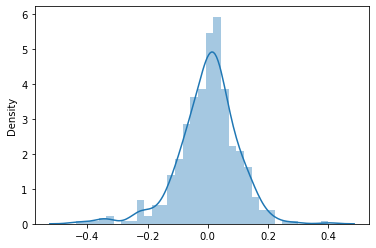

In [532]:
res = y_train - y_train_pred
sns.distplot(res)

### Making predictions on test set 

In [533]:
#df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()
num_vars

['temp', 'hum', 'windspeed', 'cnt']

In [534]:
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,clear,light,misty,spring,summer,winter
184,0,1,0,0.831783,0.657364,0.084219,0.692706,0,0,1,0,0,0
535,1,0,1,0.901354,0.610133,0.153728,0.712034,1,0,0,0,1,0
299,0,0,1,0.511964,0.837699,0.334206,0.303382,0,0,1,0,0,1
221,0,0,1,0.881625,0.437098,0.339570,0.547400,1,0,0,0,0,0
152,0,0,1,0.817246,0.314298,0.537414,0.569029,1,0,0,0,1,0


In [535]:
df_test.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,clear,light,misty,spring,summer,winter
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.698630,0.558941,0.638508,0.313350,0.520592,0.652968,0.027397,0.319635,0.255708,0.264840,0.232877
std,0.500722,0.188034,0.459904,0.233698,0.148974,0.159947,0.218435,0.477117,0.163612,0.467403,0.437258,0.442259,0.423633
min,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354650,0.527265,0.198517,0.377531,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558691,0.627737,0.299459,0.524275,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759096,0.743928,0.403048,0.672745,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [536]:
y_test = df_test.pop('cnt')
X_test = df_test

In [537]:
X_test_m7 = sm.add_constant(X_test)

In [538]:
x6_train_lm.head()

,const,yr,temp,light,misty,spring,winter
653,1.0,1,0.509887,0,0,0,1
576,1.0,1,0.815169,0,0,0,0
426,1.0,1,0.442393,0,1,1,0
728,1.0,1,0.245101,0,0,1,0
482,1.0,1,0.395666,0,1,0,0


In [539]:
X_test_m7 = X_test_m7.drop(["holiday", "workingday", "hum", "windspeed", "clear", ], axis = 1)

In [540]:
X_test_m7.head()

,const,yr,temp,light,misty,spring,summer,winter
184,1.0,0,0.831783,0,1,0,0,0
535,1.0,1,0.901354,0,0,0,1,0
299,1.0,0,0.511964,0,1,0,0,1
221,1.0,0,0.881625,0,0,0,0,0
152,1.0,0,0.817246,0,0,0,1,0


In [541]:
X_test_m7 = X_test_m7.drop(["summer"], axis = 1)

In [542]:
y_pred_m7 = lr_7.predict(X_test_m7)

Text(0, 0.5, 'BikeCount_predicted')

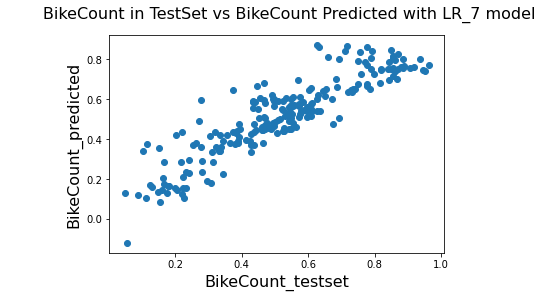

In [543]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred_m7)
fig.suptitle('       BikeCount in TestSet vs BikeCount Predicted with LR_7 model', fontsize = 16)              # Plot heading 
plt.xlabel('BikeCount_testset', fontsize = 16)                          # X-label
plt.ylabel('BikeCount_predicted', fontsize = 16)   

In [544]:
from sklearn.metrics import r2_score
r_squared = r2_score(y_test, y_pred_m7)

In [545]:
print('r_square_value :',r_squared)

r_square_value : 0.8032160894843922


### From LR_7 model  R2 :  0.805 and Adjusted R2 is 0.803 
### This is close R2 from test set 